<font size="7"><span style="color:green">Librerías

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import AdaBoostClassifier 
    # NOTA
    # para el AdaBoost hay que probar diferentes max_depth del DecisionTreeClassifier para ver cuál es el mejor

import xgboost
    # NOTA
    # xgboost.XGBRFClassifier En cada secuencia tiene un RandomForest
    # xgboost.XGBClassifier sin RandomForest

# ------------------

# Pipeline
from sklearn.pipeline import Pipeline
    # NOTA
    # Hay que poner las etiquetas automáticamente. El otro es 'from sklearn.pipeline import make_pipeline'

# ------------------

# Métricas de validación
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# ------------------

# GridSearch
from sklearn.model_selection import GridSearchCV

# ------------------

# Otras
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split




-----------
<font size="7"><span style="color:green">Dataset y análisis exploratorio de datos

Dataset: Wine Quality: (6497 filas)
    . La muestra incluye 25% de vino tinto y 75% de vino blanco
    . Contiene algunos valores nulos.

https://www.kaggle.com/datasets/rajyellow46/wine-quality

Los modelos a utilizar serán supervisados y de clasificación.

Queremos ver si un vino es suficientemente bueno para su comercialización en función de sus variables fisicoquímicas.
(Otras variables que no tengo y que podrían ser relevantes para entrenar un mejor modelo es el tipo de uva, tiempo de fermentación, tiempo en barrica y tipo de barrica)

In [2]:
vinos = pd.read_csv('data/winequalityN.csv')

In [3]:
vinos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
print('Total vinos blanco ',(vinos[vinos['type']=='white']['type'].count()))
print('Total vinos tinto ',(vinos[vinos['type']=='red']['type'].count()))

Total vinos blanco  4898
Total vinos tinto  1599


--------
<font size="6"><span style="color:blue">Comprobación de parámetros de vino tinto y blanco

In [6]:
# Hipotesis

# Los vinos tinto y blanco tienen diferentes procesos de elaboración y no se basarán en los mismos parámetros para 
# determinar su calidad.

In [4]:
print('Blanco',' fixed acidity',(vinos[vinos['type']=='white']['fixed acidity'].mean()))
print('Tinto',' fixed acidity',(vinos[vinos['type']=='red']['fixed acidity'].mean()))
print('-'*50)

print('Blanco',' volatile acidity',(vinos[vinos['type']=='white']['volatile acidity'].mean()))
print('Tinto',' volatile acidity',(vinos[vinos['type']=='red']['volatile acidity'].mean()))
print('-'*50)

print('Blanco',' citric acid',(vinos[vinos['type']=='white']['citric acid'].mean()))
print('Tinto',' citric acid',(vinos[vinos['type']=='red']['citric acid'].mean()))
print('-'*50)

print('Blanco',' residual sugar',(vinos[vinos['type']=='white']['residual sugar'].mean()))
print('Tinto',' residual sugar',(vinos[vinos['type']=='red']['residual sugar'].mean()))
print('-'*50)

print('Blanco',' chlorides',(vinos[vinos['type']=='white']['chlorides'].mean()))
print('Tinto',' chlorides',(vinos[vinos['type']=='red']['chlorides'].mean()))
print('-'*50)

print('Blanco',' free sulfur dioxide',(vinos[vinos['type']=='white']['free sulfur dioxide'].mean()))
print('Tinto',' free sulfur dioxide',(vinos[vinos['type']=='red']['free sulfur dioxide'].mean()))
print('-'*50)

print('Blanco',' total sulfur dioxide',(vinos[vinos['type']=='white']['total sulfur dioxide'].mean()))
print('Tinto',' total sulfur dioxide',(vinos[vinos['type']=='red']['total sulfur dioxide'].mean()))
print('-'*50)

print('Blanco',' density',(vinos[vinos['type']=='white']['density'].mean()))
print('Tinto',' density',(vinos[vinos['type']=='red']['density'].mean()))

Blanco  fixed acidity 6.855531697341513
Tinto  fixed acidity 8.32210394489668
--------------------------------------------------
Blanco  volatile acidity 0.2782518912287875
Tinto  volatile acidity 0.5277377972465582
--------------------------------------------------
Blanco  citric acid 0.3342504084967321
Tinto  citric acid 0.2711451814768461
--------------------------------------------------
Blanco  residual sugar 6.3932495915032685
Tinto  residual sugar 2.53880550343965
--------------------------------------------------
Blanco  chlorides 0.045778390522875814
Tinto  chlorides 0.08746654158849279
--------------------------------------------------
Blanco  free sulfur dioxide 35.30808493262556
Tinto  free sulfur dioxide 15.874921826141339
--------------------------------------------------
Blanco  total sulfur dioxide 138.36065741118824
Tinto  total sulfur dioxide 46.46779237023139
--------------------------------------------------
Blanco  density 0.9940273764801959
Tinto  density 0.996746

In [5]:
print('Blanco',' pH',(vinos[vinos['type']=='white']['pH'].mean()))
print('Tinto',' pH',(vinos[vinos['type']=='red']['pH'].mean()))
print('-'*50)

print('Blanco',' sulphates',(vinos[vinos['type']=='white']['sulphates'].mean()))
print('Tinto',' sulphates',(vinos[vinos['type']=='red']['sulphates'].mean()))
print('-'*50)

print('Blanco',' alcohol',(vinos[vinos['type']=='white']['alcohol'].mean()))
print('Tinto',' alcohol',(vinos[vinos['type']=='red']['alcohol'].mean()))
print('-'*50)

print('Blanco',' quality',(vinos[vinos['type']=='white']['quality'].mean()))
print('Tinto',' quality',(vinos[vinos['type']=='red']['quality'].mean()))

Blanco  pH 3.188202821508894
Tinto  pH 3.3108641202254225
--------------------------------------------------
Blanco  sulphates 0.48983455882352944
Tinto  sulphates 0.6580776455854727
--------------------------------------------------
Blanco  alcohol 10.51426704777011
Tinto  alcohol 10.422983114446529
--------------------------------------------------
Blanco  quality 5.87790935075541
Tinto  quality 5.6360225140712945


In [9]:
# Vemos que la media en la mayoría de sus parámetros son muy diferentes, mientras que la de la calidad no.
# Con esto hemos comprobado que la hipótesis anterior era cierta y habrá que separarlos.

--------
<font size="6"><span style="color:blue">Dividir el df en dos: Blancos y Tintos

BLANCO

In [6]:
blanco=vinos[vinos['type']=='white'].reset_index()
blanco = blanco.drop(['index', 'type'], axis=1)

In [11]:
blanco.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
blanco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4890 non-null   float64
 1   volatile acidity      4891 non-null   float64
 2   citric acid           4896 non-null   float64
 3   residual sugar        4896 non-null   float64
 4   chlorides             4896 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4891 non-null   float64
 9   sulphates             4896 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
# Vemos como tiene algunos valores nulos

In [14]:
blanco.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


-----

TINTO

In [8]:
tinto=vinos[vinos['type']=='red'].reset_index()
tinto = tinto.drop(['index', 'type'], axis=1)

In [25]:
tinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,apto
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
tinto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1597 non-null   float64
 1   volatile acidity      1598 non-null   float64
 2   citric acid           1598 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
# Tambíen cuenta con algún valor nulo

In [19]:
tinto.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.000000,1598.000000,1598.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1597.000000,1597.000000,1599.000000,1599.000000
mean,8.322104,0.527738,0.271145,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,5.636023
std,1.740767,0.179085,0.194744,1.409928,0.047065,10.460157,32.895324,0.001887,0.154290,0.169594,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


--------
<font size="6"><span style="color:blue">QUITAR VALORES NULOS

In [20]:
# La muestra es lo suficientemente grande y los valores nulos excasos, por lo que se pueden eliminar directamente.
# Si hubiese más valores nulos, sería mejor hacerles la media(mediana o moda), para tener más datos a la hora de entrenar el modelo.

In [10]:
blanco = blanco.dropna()

In [11]:
blanco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4870 non-null   float64
 1   volatile acidity      4870 non-null   float64
 2   citric acid           4870 non-null   float64
 3   residual sugar        4870 non-null   float64
 4   chlorides             4870 non-null   float64
 5   free sulfur dioxide   4870 non-null   float64
 6   total sulfur dioxide  4870 non-null   float64
 7   density               4870 non-null   float64
 8   pH                    4870 non-null   float64
 9   sulphates             4870 non-null   float64
 10  alcohol               4870 non-null   float64
 11  quality               4870 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 494.6 KB


In [12]:
# TINTO
tinto = tinto.dropna()

--------
<font size="6"><span style="color:blue">ASIGNAR SI UN VINO ES APTO O NO APTO EN FUNCIÓN DE SU CALIFICACIÓN

In [13]:
blanco['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [24]:
# Vemos como las calificaciones van del 3 al 9.
# Queremos ver si un vino es lo suficientemente bueno para su venta, por lo que se les dividirá en:
# Calificación de 3, 4 y 5 -> 'no aptos = 0'
# Calificación de 6, 7, 8 y 9 -> 'aptos = 1'

In [15]:
# Generamos una nueva columna de 'apto' o 'no apto'. Será nuestro nuevo TARGET
my_dict={3:0, 4:0, 5:0,
        6:1, 7:1, 8:1, 9:1}

blanco['apto']= blanco['quality'].map(my_dict)

# Ya no queremos la variable 'quality' para nada, así que la quitamos 
blanco = blanco.drop(['quality'], axis=1)

In [16]:
blanco.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,apto
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1


In [14]:
tinto['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
# TINTO
my_dict={3:0, 4:0, 5:0,
        6:1, 7:1, 8:1}

tinto['apto']= tinto['quality'].map(my_dict)

tinto = tinto.drop(['quality'], axis=1)

--------
<font size="6"><span style="color:blue">VER SI ESTÁ BALANCEADO

In [27]:
blanco['apto'].value_counts(normalize=True)

1    0.665298
0    0.334702
Name: apto, dtype: float64

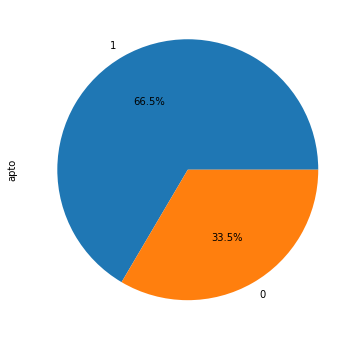

In [28]:
plt.figure(figsize=(10,6))
blanco['apto'].value_counts().plot.pie(autopct="%.1f%%");



# Alumno\ds_thebridge_6_22\3-Machine_Learning\ML_Guide\ML Guide.ipynb
# https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [29]:
# Vemos que SÍ que está balanceado.

In [30]:
# En caso de haberlo hecho con las 7 categorías de calidad, nos hubiesemos encontrado con un problema de balanceo.
blanco['quality'].value_counts(normalize=True)

6    0.448871
5    0.297331
7    0.179671
8    0.035729
4    0.033265
3    0.004107
9    0.001027
Name: quality, dtype: float64

In [20]:
# TINTO

tinto['apto'].value_counts(normalize=True)

1    0.534212
0    0.465788
Name: apto, dtype: float64

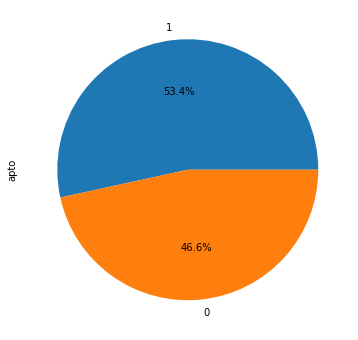

In [21]:
plt.figure(figsize=(10,6))
tinto['apto'].value_counts().plot.pie(autopct="%.1f%%");

-----------
<font size="7"><span style="color:green">EDA (VISUALIZACIÓN)

-----------


--------
<font size="6"><span style="color:blue">Heatmap

In [ ]:
# Hipotesis, quitar density porque......

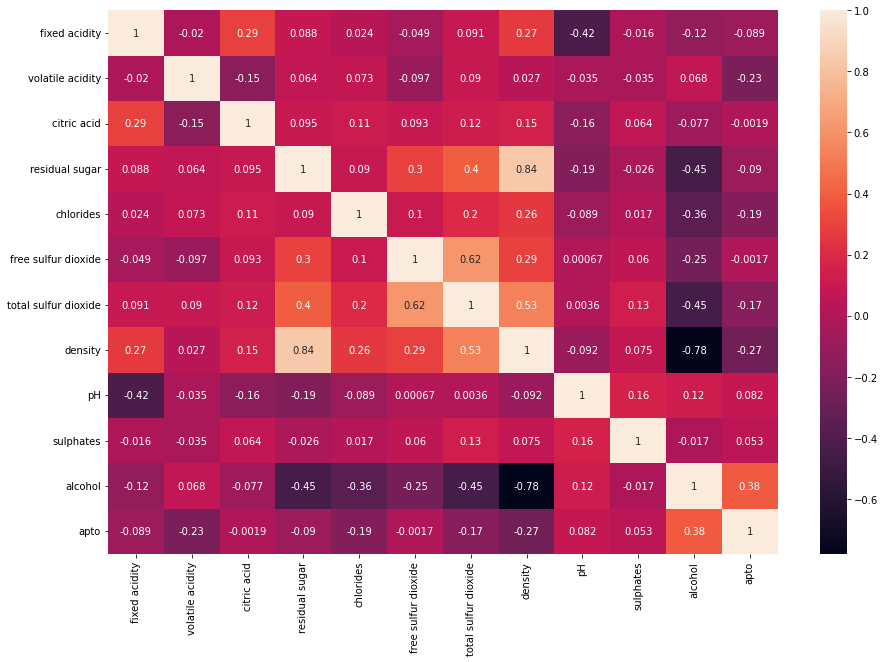

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(blanco.corr(), annot=True);

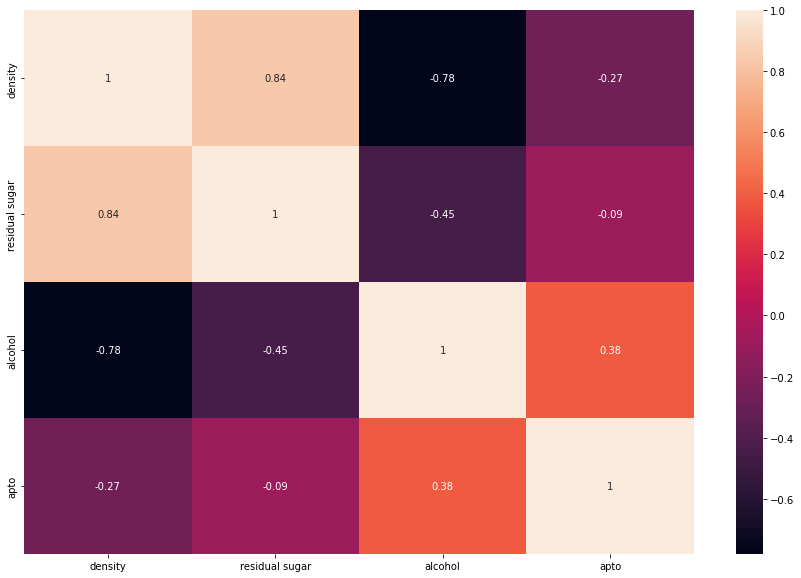

In [32]:
# Vemos como algunas variables están fuertemente correlacionadas entre si. Hay más, este heatmap es solo un ejemplo de algunas de ellas.
# Habrá que elegir cuáles cogemos para el modelo definitivo.
plt.figure(figsize=(15,10))
sns.heatmap(blanco[['density', 'residual sugar', 'alcohol','apto']].corr(), annot=True);

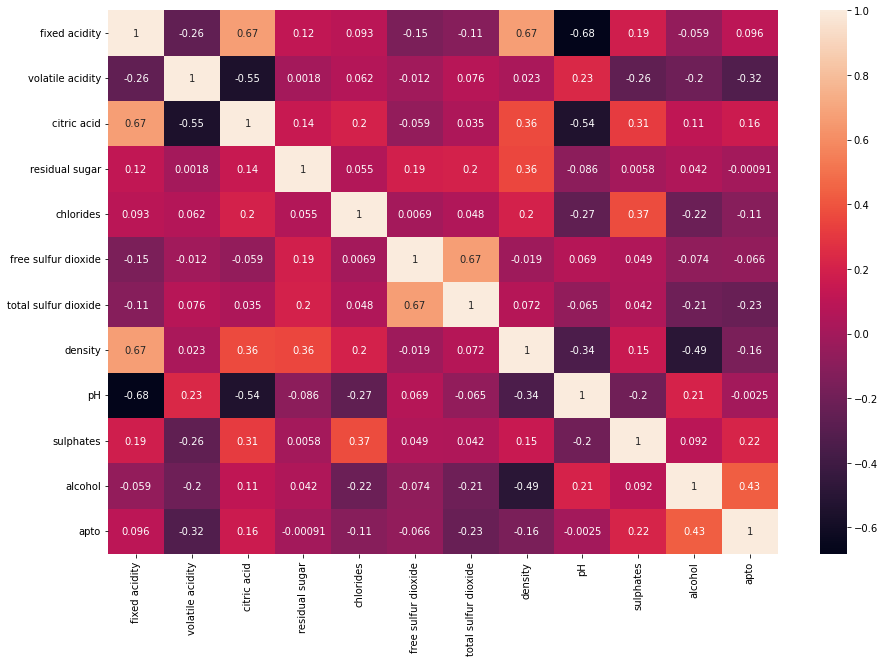

In [23]:
# TINTO

plt.figure(figsize=(15,10))
sns.heatmap(tinto.corr(), annot=True);

In [33]:
# sns.pairplot(blanco, hue='apto');

-----------
<font size="7"><span style="color:brown">MODELOS

-----------


--------
<font size="6"><span style="color:red">Modelo 1: De ejemplo

DecisionTreeClassifier con todas las variables

<font size="6"><span style="color:orange">PRUEBA Pipeline

Con todas las variables

In [ ]:
seed=55

In [44]:
X = blanco.iloc[:,:-1] # todas las columnas menos 'quality' y 'apto'
y = blanco['apto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3896, 11)
(974, 11)
(3896,)
(974,)


In [47]:
pipe_lr = Pipeline(steps=[('scaler', StandardScaler()),
                       ('classifier', LogisticRegression(random_state=seed))])

In [48]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [49]:
pred_lr= pipe_lr.predict(X_test)
# pred_lr

In [50]:
pipe_lr.score(X_train, y_train)

0.7484599589322382

In [51]:
confusion_matrix(y_test, pred_lr)

array([[164, 163],
       [ 64, 583]], dtype=int64)

<AxesSubplot:>

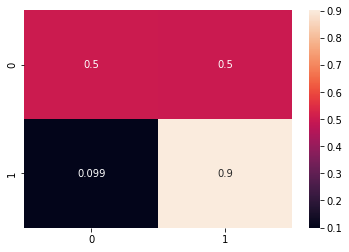

In [52]:
sns.heatmap(confusion_matrix(y_test,pred_lr, normalize='true'), annot=True)

<font size="6"><span style="color:red">Modelo 2: Con PipeLine y GridSearch

MODELOS: LogisticRegression, KNeighborsClassifier, RandomForestClassifier, GradientBoostingClassifier, SVC, 

VARIABLES: Todas

ESCALADO: SÍ

In [ ]:
X = blanco.iloc[:,:-1] # todas las columnas menos 'quality' y 'apto'
y = blanco['apto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [53]:

pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

In [54]:
svm_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [SVC()],
              'classifier__C': [0.05,0.1,0.3],
              'classifier__kernel': ['linear','rbf','sigmoid']
}

log_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1','l2'],
              'classifier__C': np.logspace(0,2,5)
}

knn_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [3,5,7,9,11],
              'classifier__weights': ['uniform','distance']
}

rf_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [100,150,200],
              'classifier__max_depth': [2,3,4],
              'classifier__min_samples_leaf': [3,5,7]
}

gb_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [GradientBoostingClassifier()],
              'classifier__n_estimators': [50,100,150],
              'classifier__learning_rate': [0.1,0.3,0.5]
}

search_space = [svm_params, log_params, knn_params, rf_params, gb_params]

In [55]:
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)

In [56]:
best_model = clf.fit(X_train, y_train)

c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 975.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\skl

In [57]:
y_pred = best_model.best_estimator_.predict(X_test)

Best model. Best Score 0.8033877349452564 
 --------------------------------------------------
Best model. Best Params {'classifier': KNeighborsClassifier(n_neighbors=11, weights='distance'), 'classifier__n_neighbors': 11, 'classifier__weights': 'distance', 'kbest__k': 11} 
 --------------------------------------------------
Accuracy Score 0.8254620123203286 
 --------------------------------------------------
Confusion Matrix 
 [[211 116]
 [ 54 593]] 
 --------------------------------------------------


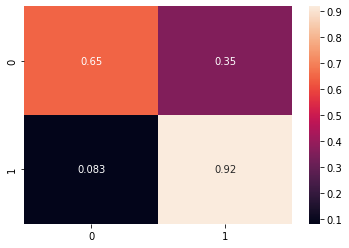

In [58]:
print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

<font size="6"><span style="color:red">Modelo 3: Con PipeLine y GridSearch

MODELOS: LogisticRegression, KNeighborsClassifier, RandomForestClassifier, GradientBoostingClassifier, SVC, 

VARIABLES: Todas

ESCALADO: NO

In [59]:
from sklearn.pipeline import Pipeline
pipe_NE = Pipeline(steps=[('kbest', SelectKBest()),
                          ('classifier', LogisticRegression(random_state=seed))])

In [60]:
clf = GridSearchCV(estimator=pipe_NE, param_grid=search_space, cv=3, n_jobs=-1)

In [61]:
best_model = clf.fit(X_train, y_train)

c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 975.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\skl

In [62]:
y_pred = best_model.best_estimator_.predict(X_test)

Best model. Best Score 0.7980005559173368 
 --------------------------------------------------
Best model. Best Params {'classifier': GradientBoostingClassifier(learning_rate=0.5, n_estimators=150), 'classifier__learning_rate': 0.5, 'classifier__n_estimators': 150, 'kbest__k': 11} 
 --------------------------------------------------
Accuracy Score 0.8141683778234087 
 --------------------------------------------------
Confusion Matrix 
 [[226 101]
 [ 80 567]] 
 --------------------------------------------------


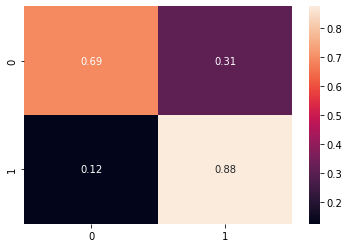

In [63]:
print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

<font size="6"><span style="color:red">Modelo 4: Con PipeLine y GridSearch

MODELOS: LogisticRegression, KNeighborsClassifier, RandomForestClassifier, GradientBoostingClassifier, SVC, 

VARIABLES: Todas

ESCALADO: SÍ

In [108]:

pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

In [115]:
svm_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [SVC()],
              'classifier__C': [0.05,0.1,0.3,0.5],
              'classifier__kernel': ['linear','rbf','sigmoid']
}

log_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1','l2'],
              'classifier__C': np.logspace(0,2,5)
}

knn_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [3,5,7,9,11],
              'classifier__weights': ['uniform','distance']
}

rf_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [100,150,200],
              'classifier__max_depth': [2,3,4,5,6,7],
              'classifier__min_samples_leaf': [3,5,7]
}

gb_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [GradientBoostingClassifier()],
              'classifier__n_estimators': [100,130,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

ada_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [AdaBoostClassifier()],
            #   'classifier__max_depth': [2,3,4],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

xgb_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [xgboost.XGBRFClassifier()],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

# FALTA XGBRF


# search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params]
search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]

In [116]:
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)

In [117]:
best_model = clf.fit(X_train, y_train)

c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 2295.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sk

In [118]:
y_pred = best_model.best_estimator_.predict(X_test)

Best model. Best Score 0.8033877349452564 
 --------------------------------------------------
Best model. Best Params {'classifier': KNeighborsClassifier(n_neighbors=11, weights='distance'), 'classifier__n_neighbors': 11, 'classifier__weights': 'distance', 'kbest__k': 11} 
 --------------------------------------------------
Accuracy Score 0.8254620123203286 
 --------------------------------------------------
Confusion Matrix 
 [[211 116]
 [ 54 593]] 
 --------------------------------------------------


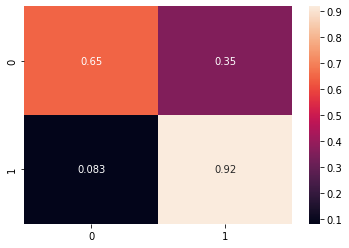

In [119]:
print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

<font size="6"><span style="color:orange">PRUEBA AdaBoost

Con todas las variables

In [81]:
estimator = DecisionTreeClassifier(max_depth=7)

ada_clf = AdaBoostClassifier(base_estimator = estimator, #Se sulene utilizar Arboles de decision para el AdaBoost
                             n_estimators=200,
                             learning_rate=0.5, #es el parametro del ejemplo de MIGUEL de la pagina de google. Los puntos en la curva, step by step
                             random_state=seed)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8326488706365504

<font size="6"><span style="color:orange">PRUEBA XGBClassifier

Con todas las variables

In [82]:
xgb_clas = xgboost.XGBClassifier(random_state=seed) 

# No confundir con  xgboost.XGBRFClassifier

# xgboost.XGBRFClassifier En cada secuencia tiene un RandomForest
# xgboost.XGBClassifier sin RandomForest

xgb_clas.fit(X_train, y_train)
y_pred = xgb_clas.predict(X_test)
accuracy_score(y_test, y_pred)

0.8275154004106776

In [83]:
xgbrf_clas = xgboost.XGBRFClassifier(random_state=seed) 

# No confundir con  xgboost.XGBRFClassifier

# xgboost.XGBRFClassifier En cada secuencia tiene un RandomForest
# xgboost.XGBClassifier sin RandomForest

xgbrf_clas.fit(X_train, y_train)
y_pred = xgbrf_clas.predict(X_test)
accuracy_score(y_test, y_pred)

0.7864476386036962

<font size="6"><span style="color:orange">PRUEBA GridSearch con Scaler

Con menos variables

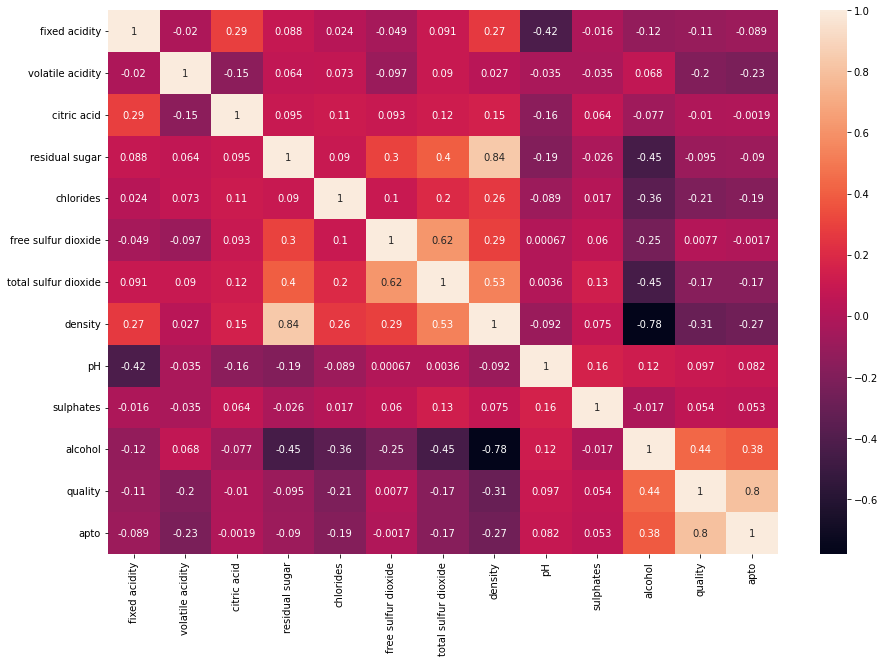

In [120]:
plt.figure(figsize=(15,10))
sns.heatmap(blanco.corr(), annot=True);

In [149]:
X = blanco[['fixed acidity','volatile acidity', 'citric acid','residual sugar', 'chlorides', 'total sulfur dioxide', 'pH','sulphates','alcohol']]
y = blanco['apto']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [150]:
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

In [151]:
svm_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [SVC()],
              'classifier__C': [0.05,0.1,0.3,0.5],
              'classifier__kernel': ['linear','rbf','sigmoid']
}

log_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1','l2'],
              'classifier__C': np.logspace(0,2,5)
}

knn_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [3,5,7,9,11,13],
              'classifier__weights': ['uniform','distance']
}

rf_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [100,150,200],
              'classifier__max_depth': [2,3,4,5,6,7],
              'classifier__min_samples_leaf': [3,5,7]
}

gb_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [GradientBoostingClassifier()],
              'classifier__n_estimators': [100,130,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

ada_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [AdaBoostClassifier()],
            #   'classifier__max_depth': [2,3,4],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

xgb_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [xgboost.XGBRFClassifier()],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

# FALTA XGBRF


# search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params]
search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]

In [152]:
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)
# clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=10, n_jobs=-1) MISMO RESULTADO

In [153]:
best_model = clf.fit(X_train, y_train)

c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1680 fits failed out of a total of 7400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeli

In [154]:
y_pred = best_model.best_estimator_.predict(X_test)

Best model. Best Score 0.7969699737421975 
 --------------------------------------------------
Best model. Best Params {'classifier': KNeighborsClassifier(n_neighbors=11, weights='distance'), 'classifier__n_neighbors': 11, 'classifier__weights': 'distance', 'kbest__k': 9} 
 --------------------------------------------------
Accuracy Score 0.8305954825462012 
 --------------------------------------------------
Confusion Matrix 
 [[210 117]
 [ 48 599]] 
 --------------------------------------------------


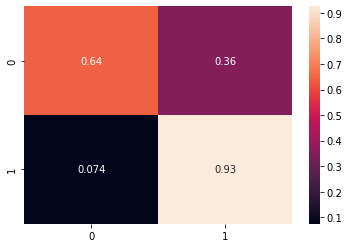

In [130]:
print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

Best model. Best Score 0.8162125107112252 
 --------------------------------------------------
Best model. Best Params {'classifier': KNeighborsClassifier(n_neighbors=11, weights='distance'), 'classifier__n_neighbors': 11, 'classifier__weights': 'distance', 'kbest__k': 9} 
 --------------------------------------------------
Accuracy Score 0.8305954825462012 
 --------------------------------------------------
Confusion Matrix 
 [[210 117]
 [ 48 599]] 
 --------------------------------------------------


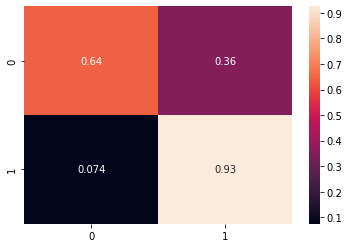

In [155]:
print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

<font size="6"><span style="color:orange">PRUEBA GridSearch SIN Scaler

Con menos variables

In [131]:
pipe = Pipeline(steps=[('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

In [132]:
svm_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [SVC()],
              'classifier__C': [0.05,0.1,0.3,0.5],
              'classifier__kernel': ['linear','rbf','sigmoid']
}

log_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1','l2'],
              'classifier__C': np.logspace(0,2,5)
}

knn_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [3,5,7,9,11],
              'classifier__weights': ['uniform','distance']
}

rf_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [100,150,200],
              'classifier__max_depth': [2,3,4,5,6,7],
              'classifier__min_samples_leaf': [3,5,7]
}

gb_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [GradientBoostingClassifier()],
              'classifier__n_estimators': [100,130,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

ada_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [AdaBoostClassifier()],
            #   'classifier__max_depth': [2,3,4],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

xgb_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [xgboost.XGBRFClassifier()],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

# FALTA XGBRF


# search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params]
search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]

In [133]:
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)

best_model = clf.fit(X_train, y_train)

c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
498 fits failed out of a total of 2190.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
438 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline

In [134]:
y_pred = best_model.best_estimator_.predict(X_test)

Best model. Best Score 0.7872206624114871 
 --------------------------------------------------
Best model. Best Params {'classifier': GradientBoostingClassifier(learning_rate=0.3, n_estimators=200), 'classifier__learning_rate': 0.3, 'classifier__n_estimators': 200, 'kbest__k': 9} 
 --------------------------------------------------
Accuracy Score 0.8039014373716632 
 --------------------------------------------------
Confusion Matrix 
 [[210 117]
 [ 74 573]] 
 --------------------------------------------------


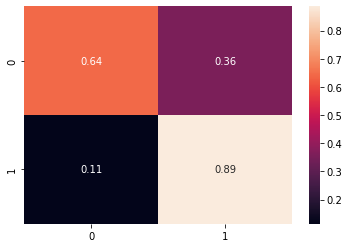

In [135]:
print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

<font size="6"><span style="color:orange">PRUEBA GridSearch con Scaler y stratify=y

Con menos variables

strtify para conservar los mismos balances de la target

In [143]:
X = blanco[['fixed acidity','volatile acidity', 'citric acid','residual sugar', 'chlorides', 'total sulfur dioxide', 'pH','sulphates','alcohol']]
y = blanco['apto']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [144]:
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

In [145]:
svm_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [SVC()],
              'classifier__C': [0.05,0.1,0.3,0.5],
              'classifier__kernel': ['linear','rbf','sigmoid']
}

log_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1','l2'],
              'classifier__C': np.logspace(0,2,5)
}

knn_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [3,5,7,9,11],
              'classifier__weights': ['uniform','distance']
}

rf_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [100,150,200],
              'classifier__max_depth': [2,3,4,5,6,7],
              'classifier__min_samples_leaf': [3,5,7]
}

gb_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [GradientBoostingClassifier()],
              'classifier__n_estimators': [100,130,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

ada_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [AdaBoostClassifier()],
            #   'classifier__max_depth': [2,3,4],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

xgb_params = {'kbest__k': [2,5,7,9,11],
              'classifier': [xgboost.XGBRFClassifier()],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

# FALTA XGBRF


# search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params]
search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]


# VER Alumno\ds_thebridge_6_22\3-Machine_Learning\1-Supervisado\3-RegorClass\8-Ensembles\Ensembles.ipynb
# VER Profesor\ds_thebridge_6_22\3-Machine_Learning\1-Supervisado\4-Pipelines\ejercicios\Breast_cancer.ipynb

In [146]:
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)

best_model = clf.fit(X_train, y_train)

c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
498 fits failed out of a total of 2190.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
438 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline

In [147]:
y_pred = best_model.best_estimator_.predict(X_test)

Best model. Best Score 0.8003114086020102 
 --------------------------------------------------
Best model. Best Params {'classifier': KNeighborsClassifier(n_neighbors=11, weights='distance'), 'classifier__n_neighbors': 11, 'classifier__weights': 'distance', 'kbest__k': 7} 
 --------------------------------------------------
Accuracy Score 0.8193018480492813 
 --------------------------------------------------
Confusion Matrix 
 [[209 117]
 [ 59 589]] 
 --------------------------------------------------


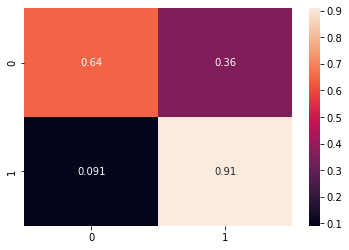

In [148]:
print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);